## **IMPORT COMMON PACKAGES DAN DATASET**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
import missingno as msno

In [ ]:
data = fetch_openml(name="boston", version=1, as_frame=True)
boston = data.frame
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
lines = data.DESCR.splitlines()

variables_df = pd.DataFrame(
    [[line.split(maxsplit=1)[0], line.split(maxsplit=1)[1]]
     for line in lines if len(line.split()) > 1 and line.split()[0].isupper()],
    columns=["Variable", "Description"]
)

display(variables_df)

,Variable,Description
0,CRIM,per capita crime rate by town
1,ZN,proportion of residential land zoned for lots ...
2,INDUS,proportion of non-retail business acres per town
3,CHAS,Charles River dummy variable (= 1 if tract bou...
4,NOX,nitric oxides concentration (parts per 10 mill...
5,RM,average number of rooms per dwelling
6,AGE,proportion of owner-occupied units built prior...
7,DIS,weighted distances to five Boston employment c...
8,RAD,index of accessibility to radial highways
9,TAX,"full-value property-tax rate per $10,000"


## **CEK MISSING VALUE**

<Axes: >

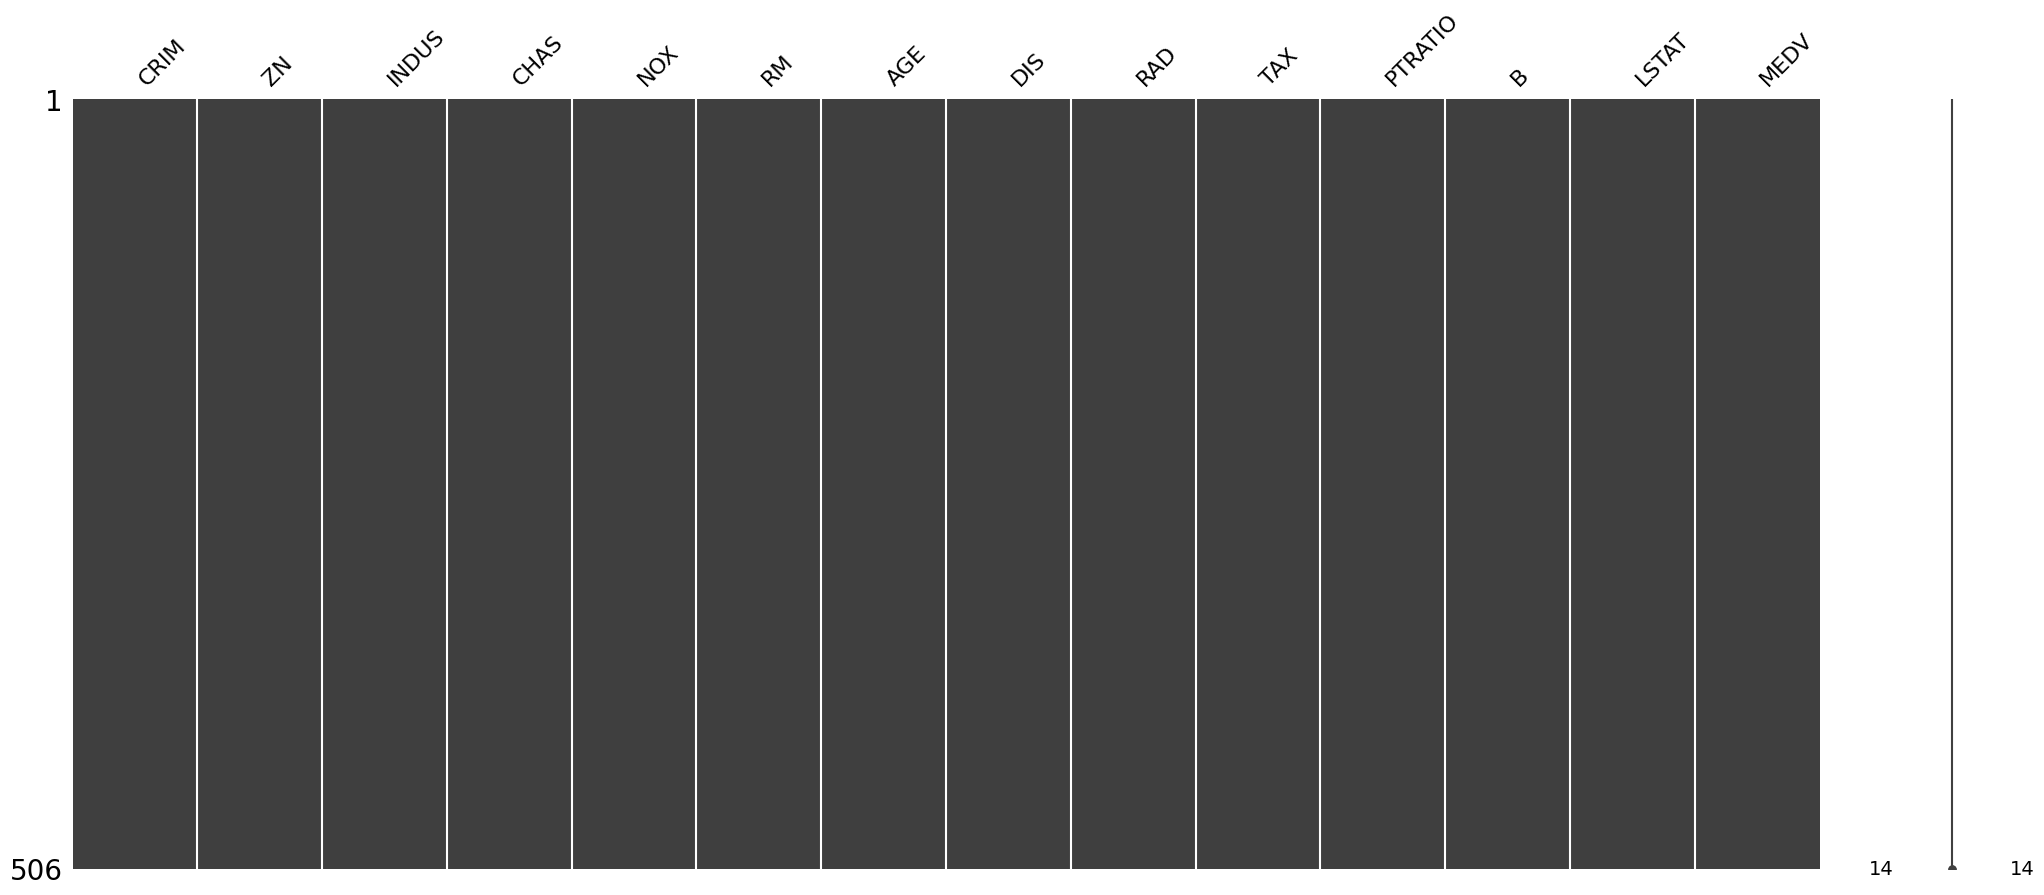

In [ ]:
msno.matrix(boston)

## **SPLITTING**

In [ ]:
from sklearn.model_selection import train_test_split

X = boston.drop(columns="MEDV")
y = boston["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     404 non-null    float64 
 1   ZN       404 non-null    float64 
 2   INDUS    404 non-null    float64 
 3   CHAS     404 non-null    category
 4   NOX      404 non-null    float64 
 5   RM       404 non-null    float64 
 6   AGE      404 non-null    float64 
 7   DIS      404 non-null    float64 
 8   RAD      404 non-null    category
 9   TAX      404 non-null    float64 
 10  PTRATIO  404 non-null    float64 
 11  B        404 non-null    float64 
 12  LSTAT    404 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 39.1 KB


In [ ]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## **TRAINING**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
        ]), ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS' , 'TAX', 'PTRATIO', 'B', 'LSTAT']),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), ['RAD', 'CHAS'])
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('algo', RandomForestRegressor(random_state=42))
])

parameter = {
    'algo__n_estimators': [50, 100, 200],
    'algo__max_depth': [10, 20, None],
    'algo__max_features': ['sqrt', 'log2', None],
    'algo__min_samples_leaf': [1, 2, 4]
}

In [ ]:
model = GridSearchCV(pipeline, param_grid=parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['CRIM',
                                                                          'ZN',
                                                                          'INDUS',
                                                                          'NOX',
                                                                          'RM',
                                                                          'AGE',
                                                                          'DIS',
                                                                          'TAX',
                                                                          'PTRATIO',
                                                                          'B',
                                                                          'LSTAT']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['RAD',
                                                                          'CHAS'])])),
                                       ('algo',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'algo__max_depth': [10, 20, None],
                         'algo__max_features': ['sqrt', 'log2', None],
                         'algo__min_samples_leaf': [1, 2, 4],
                         'algo__n_estimators': [50, 100, 200]},
             verbose=1)

## **EVALUASI**

In [ ]:
print(f"Best parameters: {model.best_params_}")
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Best parameters: {'algo__max_depth': 10, 'algo__max_features': 'sqrt', 'algo__min_samples_leaf': 1, 'algo__n_estimators': 200}
0.9737630974202566 0.8281136164125421 0.8353824210442842


## **FEATURE IMPORTANCE (MEAN SCORE DECREASE)**

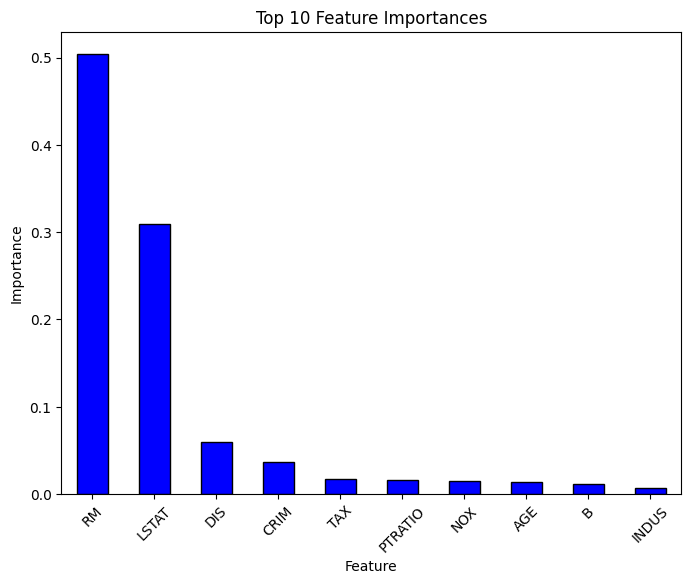

In [ ]:
import matplotlib.pyplot as plt

pipeline.fit(X_train, y_train)
model = pipeline.named_steps['algo']
preprocessor = pipeline.named_steps['preprocessor']

num_features = preprocessor.transformers_[0][2]
cat_features = preprocessor.transformers_[1][1]['encoder'].get_feature_names_out(['RAD', 'CHAS'])

feature_names = list(num_features) + list(cat_features)
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names)
top_10_features = feature_importances.nlargest(10)

plt.figure(figsize=(8, 6))
top_10_features.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Top 10 Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

## **PREDICTION**

In [ ]:
X_train.iloc[1]

,15
CRIM,0.62739
ZN,0.0
INDUS,8.14
CHAS,0
NOX,0.538
RM,5.834
AGE,56.5
DIS,4.4986
RAD,4
TAX,307.0


In [ ]:
new_data = pd.DataFrame({
    'CRIM': [0.62739],
    'ZN': [0.0],
    'INDUS': [8.14],
    'NOX': [0.538],
    'RM': [5.834],
    'AGE': [56.5],
    'DIS': [4.4986],
    'TAX': [307.0],
    'PTRATIO': [21.0],
    'B': [395.62],
    'LSTAT': [8.47],
    'RAD': [4],  # Fitur kategorikal
    'CHAS': [0]  # Fitur kategorikal
})

#new_data_transformed = preprocessor.transform(new_data)

prediction = model.predict(new_data)

# Tampilkan hasil prediksi
print(f"Prediksi harga rumah untuk data baru: {prediction[0]}")

Prediksi harga rumah untuk data baru: 19.86900000000003


## **SAVE MODEL**

In [ ]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model berhasil disimpan sebagai 'model.pkl'")